In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm.auto import tqdm
from matplotlib.path import Path
import ast
import pickle
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import networkx as nx
from collections import Counter

# Analysis

In [2]:
l = {}
threshold = [1,2,3,4,5,10,15,20,50,100,200]


for t in threshold:
    count = 0 
    fh=open('output/network_france_germany.csv','r')
    for line in fh.readlines():
        s=line.strip().split(',')
        if int(s[2]) > t:
            count = count + 1
    l[t] = count
l

{1: 610546,
 2: 348796,
 3: 239995,
 4: 181104,
 5: 143941,
 10: 65270,
 15: 38554,
 20: 25511,
 50: 4391,
 100: 508,
 200: 6}

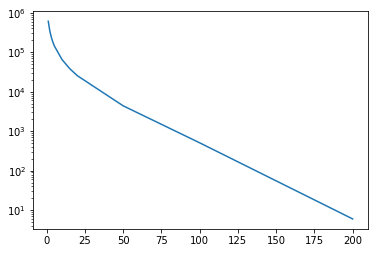

In [3]:
plt.semilogy(l.keys(),l.values())

In [32]:
def load_graph(MIN_TILES):
    G=nx.Graph()
    fh=open('output/network_france_germany.csv','r')

    for line in fh.readlines():
        s=line.strip().split(',')
        if int(s[2]) >= MIN_TILES :
            G.add_edge(str(s[0]),int(s[1]),weight = int(s[2]))
    fh.close()  
    return G

In [33]:
def max_min_tiles(guess):
    # trova il massimo numero minimo di tiles messe da un utente per cui abbiamo una componente sola!
    G = load_graph(guess)
    n_comps = len([c for c in nx.connected_components(G)])
    MIN_TILES = guess
    while n_comps > 1 :
        G  = load_graph(MIN_TILES)
        n_comps = len([c for c in nx.connected_components(G)])        
        MIN_TILES = MIN_TILES -  5

    return G, MIN_TILES

In [34]:
G,MIN_TILES = max_min_tiles(100)
MIN_TILES

15

In [35]:
G=nx.Graph()
fh=open('output/network_france_germany.csv','r')

for line in fh.readlines():
    s=line.strip().split(',')
    if int(s[2]) > MIN_TILES:
        G.add_edge(str(s[0]), int(s[1]), weight = int(s[2]))
fh.close()  

In [36]:
len(G.nodes)

38300

In [37]:
counter = 0
for node in G.nodes:
    if isinstance(node, str):
        counter += 1
counter
print('abbiamo ',counter,' artworks e ', len(G.nodes) - counter, ' utenti' )

abbiamo  9  artworks e  38291  utenti


In [38]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[38300]

In [11]:
#S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
#G = nx.Graph(S[0])

### projected graph for arts

In [39]:
arts = nx.bipartite.sets(G)[0]
users = nx.bipartite.sets(G)[1]
len(arts), len(users)

(9, 38291)

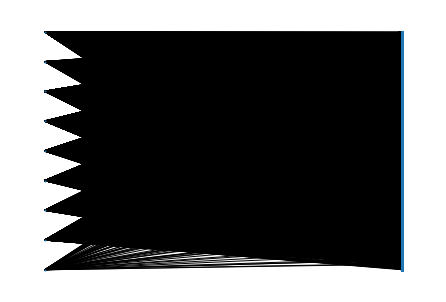

In [40]:
pos = nx.bipartite_layout(G, arts)
nx.draw(G,pos,node_size=1)
plt.savefig('plot/bipartite_net.png',dpi = 300,backend = 'cairo')

In [15]:
A = bipartite.projected_graph(G,arts, multigraph=False)
U = bipartite.projected_graph(G,users, multigraph=False)

In [16]:
len(A.edges), len(U.edges)

(3, 3033521)

In [17]:
pos = nx.circular_layout(A)
#pos = nx.kamada_kawai_layout(A)
#pos = nx.spring_layout(A)

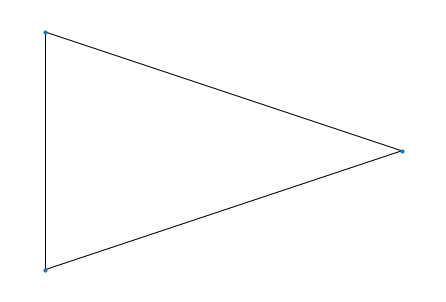

In [18]:
nx.draw(A,pos,node_size=10)
plt.savefig('plot/project_net_arts.png',dpi = 300,backend = 'cairo')

In [19]:
pos = nx.circular_layout(U)
#pos = nx.kamada_kawai_layout(U)
#pos = nx.spring_layout(U)

In [20]:
nx.draw(U,pos,node_size=10)
plt.savefig('plot/project_net_arts.png',dpi = 300,backend = 'cairo')


KeyboardInterrupt



Error in callback <function flush_figures at 0x7fc08fd40310> (for post_execute):



KeyboardInterrupt



# analisi del network

### density

In [11]:
def density(G):
    return 2* G.number_of_edges()/(G.number_of_nodes() * (G.number_of_nodes() - 1))
density(A), density(U)

NameError: name 'A' is not defined

### distribuzione di grado

Counter({25: 14, 18: 8, 55: 6, 5: 3, 15: 3, 12: 2, 16: 2, 6: 2, 26: 1, 33: 1, 14: 1, 52: 1, 23: 1, 11: 1, 53: 1, 59: 1, 9: 1, 19: 1, 48: 1, 35: 1, 28: 1, 34: 1, 32: 1, 13: 1, 54: 1, 10: 1, 36: 1, 21: 1, 22: 1, 2: 1})


(1.0, 10000.0, 1e-05, 1.0)

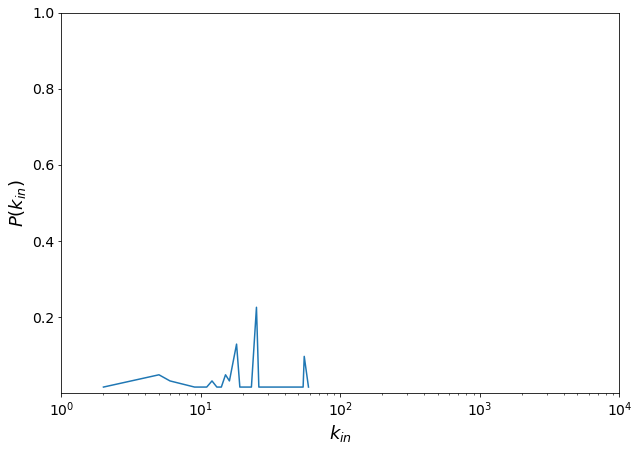

In [79]:
from collections import Counter 
import matplotlib.pyplot as plt

indeg=dict(A.degree()).values()
degin_distri=Counter(indeg)
print(degin_distri)


x=[]
y=[]

for i in sorted(degin_distri):   
    x.append(i)
    y.append(degin_distri[i]/len(A))

plt.figure(figsize=(10,7))    
plt.plot(x,y)

plt.xlabel('$k_{in}$', fontsize=18)
plt.ylabel('$P(k_{in})$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale('linear')
plt.xscale('log')
plt.axis([1,10000,0.00001,1.0])

In [ ]:
### clustering

In [ ]:
### 